# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

# Выбор варианта

In [3]:
N = 9
NN = N**2
variants = ["height","mass","income","iq","pages","age","bmi","work_exp","friends","test_time"]
print(variants[N%len(variants)])
print(variants[NN%len(variants)])

test_time
mass


# Считываем столбцы для варианта

In [8]:
import csv
import numpy as np
test_time = []
mass = []
with open('students_simple.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        test_time.append(float(row['test_time']))
        mass.append(float(row['mass']))

test_time = np.array(test_time)
mass = np.array(mass)

print("test_time:")
print(test_time)
print(f'Len: {len(test_time)}')

print("mass:")
print(mass)
print(f'Len: {len(mass)}')

test_time:
[ 8.5  6.2  6.8 12.   7.5 10.   7.2  4.2  3.5  9.5  7.8  8.   6.   4.8
  8.6 10.   4.5 12.5 10.5  6.5]
Len: 20
mass:
[45. 61. 56. 48. 54. 58. 51. 62. 70. 72. 73. 64. 73. 68. 81. 84. 76. 90.
 68. 95.]
Len: 20


## 1. Расчет корреляций
1. Фехнера

In [11]:
import numpy as np

def calculate_mean(data):
    mean = sum(data) / len(data)
    return mean

def correlation_fechner(x, y):
    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)

    x_signs = np.sign(x - x_mean)
    y_signs = np.sign(y - y_mean)

    matches = np.sum(x_signs == y_signs)
    mismatches = np.sum(x_signs != y_signs)

    fechner = (matches - mismatches) / (matches + mismatches)
    
    return fechner

print(f'Fechner correlation: {correlation_fechner(test_time, mass)}')

Fechner correlation 0.1


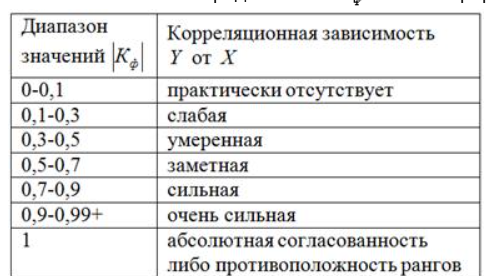
# Как видим, коэфицент корреляции 0.1, что показывает о практически отсутствующей коррелияции

# 2. Пирсона + доверительный интервал

In [32]:
import scipy.stats as stats

def cov(x, y):
    sum = 0
    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)
    
    for i in range(0, len(x)):
        sum += ((x[i] - x_mean) * (y[i] - y_mean))
        
    return sum/(len(x))


#print(cov(test_time, mass))

def correlation_pearson(x,y, confidence=0.95):

    n = len(x)
    
    covariance = cov(x,y)
    std_x = np.sqrt(np.sum((x - calculate_mean(x)) ** 2) / (n - 1))
    std_y = np.sqrt(np.sum((y - calculate_mean(y)) ** 2) / (n - 1))

    coef = covariance / (std_x * std_y)

    
    t_statistic = coef * np.sqrt((n - 2) / (1 - coef ** 2))
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), n - 2))

    z = np.arctanh(coef)  
    se_z = 1 / np.sqrt(n - 3)
    
    z_critical = stats.norm.ppf((1 + confidence) / 2)
    
    # Доверительный интервал для z
    z_lower = z - z_critical * se_z
    z_upper = z + z_critical * se_z
    
    # Обратное преобразование к r
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    return {
        'correlation': coef,
        'p_value': p_value,
        't_statistic': t_statistic,
        'ci_lower': r_lower,
        'ci_upper': r_upper,
        'confidence_level': confidence
    }

def print_test_results(title, results):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in results.items():
        print(f"{key:12} : {value:.4f}" if isinstance(value, float) else f"{key:12} : {value}")
        
#print(correlation_pearson(test_time, mass))

# Коэфицент:
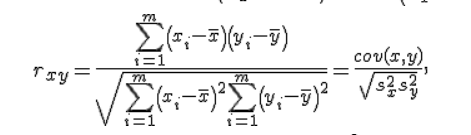

# T-статистика:
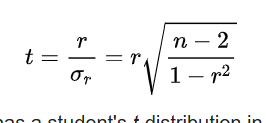

# Трансформация Фишера со стандартной ошибкой SE:
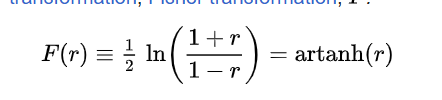
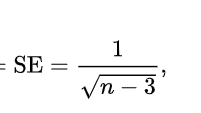

In [31]:
print_test_results('Pearson correlation', correlation_pearson(test_time, mass))


Pearson correlation
-------------------
correlation  : 0.0178
covariance   : 0.6115
p_value      : 0.9406
t_statistic  : 0.0755
ci_lower     : -0.4281
ci_upper     : 0.4567
confidence_level : 0.9500


# Выводы
Корреляция очень низкая, p_value высокое, значит, нет статистически значимых доказательств корреляции

Confidence interval: (Доверительный интервал)

CI = [-0.4281, 0.4567] 

содержит 0, и интервал симметричен относительно 0, что говорит о том что скорее всего у нас низкая корреляция

# 3. Спирмена

In [40]:
import math

def get_ranks(data):

    indexed_data = [(value, idx) for idx, value in enumerate(data)]
    
    sorted_data = sorted(indexed_data, key=lambda x: x[0])
    
    ranks = [0] * len(data)
    
    i = 0
    while i < len(sorted_data):
        # Находим группу одинаковых значений
        j = i
        while (j < len(sorted_data) - 1 and 
               math.isclose(sorted_data[j][0], sorted_data[j + 1][0])):
            j += 1
        
        # Количество 
        tie_count = j - i + 1
        # Средний ранг для группы связей
        average_rank = (i + 1 + j + 1) / 2
        # Присваиваем средний ранг всем элементам группы
        for k in range(i, j + 1):
            original_index = sorted_data[k][1]
            ranks[original_index] = average_rank
        
        i = j + 1
    
    return ranks
    
def correlation_spearman(x, y):

    n = len(x)
    
    x_ranks = get_ranks(x)
    y_ranks = get_ranks(y)
    
    covariance = cov(x_ranks,y_ranks)
    
    std_x = math.sqrt(sum((r - calculate_mean(x)) ** 2 for r in x_ranks))
    std_y = math.sqrt(sum((r - calculate_mean(y)) ** 2 for r in y_ranks))
    
    if std_x * std_y == 0:
        return 0
    else:
        spearman = covariance / (std_x * std_y)
    
    return spearman



# Коэфицент Спирмена:

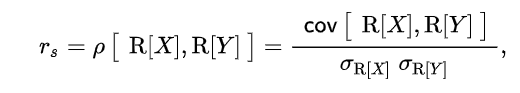

In [41]:
print(f'Spearman correlation: {correlation_spearman(test_time, mass)}')

Spearman correlation: -6.14648409186611e-05


Полное отсутсвие корреляции

# 4. Кенделла

In [44]:
def count_ties(ranks):
    
    rank_counts = {}
    for rank in ranks:
        rank_counts[rank] = rank_counts.get(rank, 0) + 1
    
    ties = 0
    for count in rank_counts.values():
        if count > 1:
            ties += count * (count - 1) / 2
    
    return ties
    
def correlation_kendall(x, y):

    n = len(x)
    
    ranks_x = get_ranks(x)
    ranks_y = get_ranks(y)
    
    concordant = 0
    discordant = 0
    
    # Перебираем все уникальные пары (i, j) где i < j
    for i in range(n):
        for j in range(i + 1, n):
            dx = ranks_x[i] - ranks_x[j]
            dy = ranks_y[i] - ranks_y[j]
            
            # Если оба различия имеют одинаковый знак - согласованная пара
            if dx * dy > 0:
                concordant += 1
            # Если знаки разные - несогласованная пара
            elif dx * dy < 0:
                discordant += 1
            # Если dx = 0 или dy = 0 - это tie, не учитывается
    
    total_pairs = n * (n - 1) / 2
    
    ties_x = count_ties(ranks_x)
    ties_y = count_ties(ranks_y)
    
    # Корректировка общего количества пар с учетом tieв
    adjusted_total = math.sqrt((total_pairs - ties_x) * (total_pairs - ties_y))
    
    if adjusted_total == 0:
        tau = 0.0
    else:
        tau = (concordant - discordant) / adjusted_total
    
    return tau

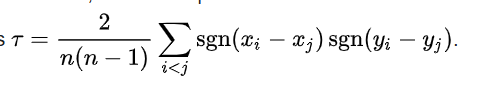

При наличии tieв

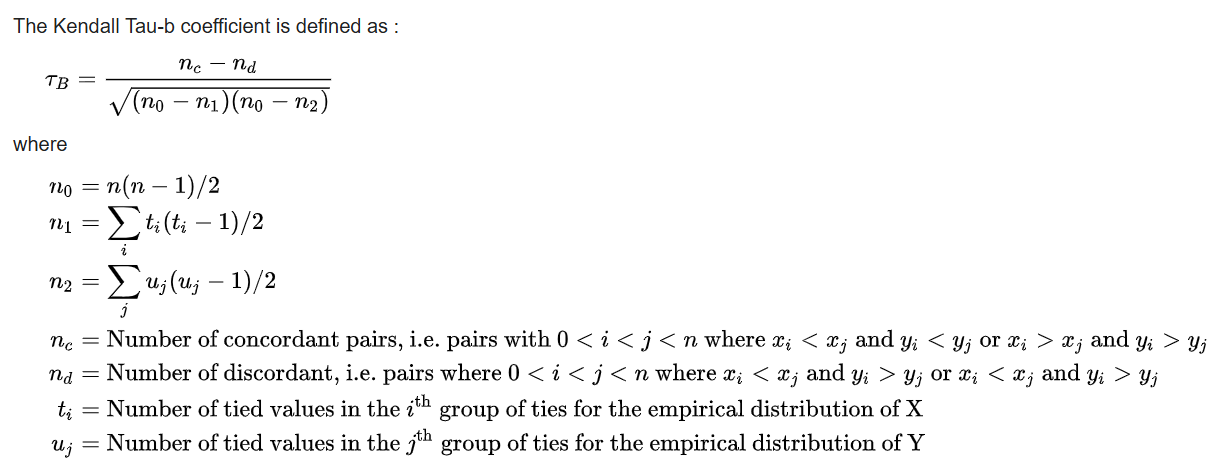

In [45]:
print(f'Kendall correlation: {correlation_kendall(test_time, mass)}')

Kendall correlation: -0.026525292253301264


Опять же, коэффицент корреляции очень близок к нулю

In [47]:
print(f'Fechner correlation: {correlation_fechner(test_time, mass)}')
print(f'Pearson correlation: {correlation_pearson(test_time, mass)['correlation']}')
print(f'Spearman correlation: {correlation_spearman(test_time, mass)}')
print(f'Kendall correlation: {correlation_kendall(test_time, mass)}')

Fechner correlation: 0.1
Pearson correlation: 0.017794468009346146
Spearman correlation: -6.14648409186611e-05
Kendall correlation: -0.026525292253301264


## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

In [57]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10, title="Гистограмма"):

    plt.figure(figsize=(10, 6))
    
    n, bins, patches = plt.hist(data, bins=bins, alpha=0.7, color='skyblue', 
                               edgecolor='black', density=True)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    #return n, bins

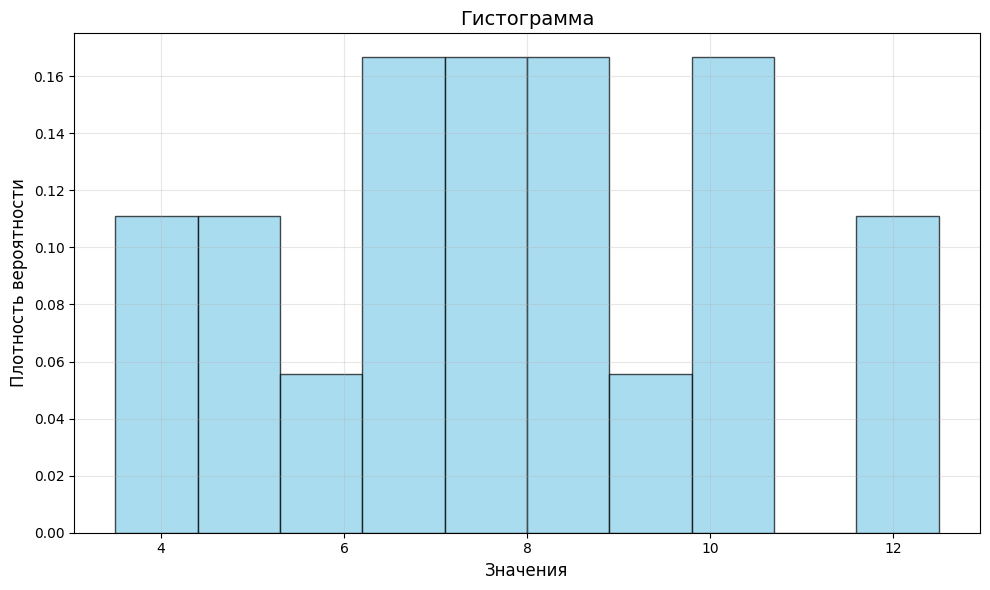

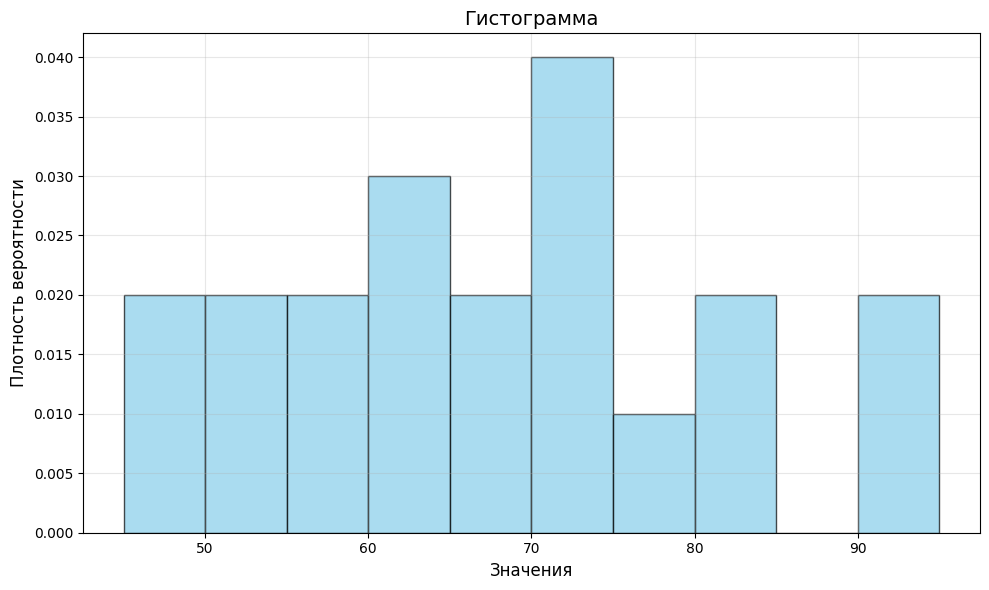

In [58]:
plot_histogram(test_time)
plot_histogram(mass)

In [60]:
def scatter_plot(array, title="Scatter Plot", xlabel="Index", ylabel="Values", color='blue', alpha=0.7):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(array)), array, color=color, alpha=alpha, s=50)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


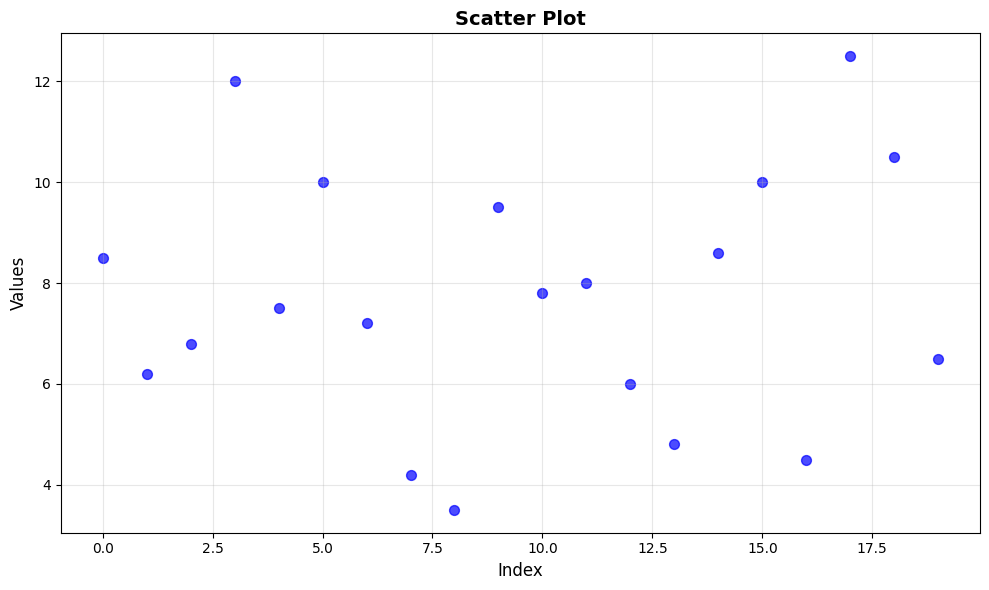

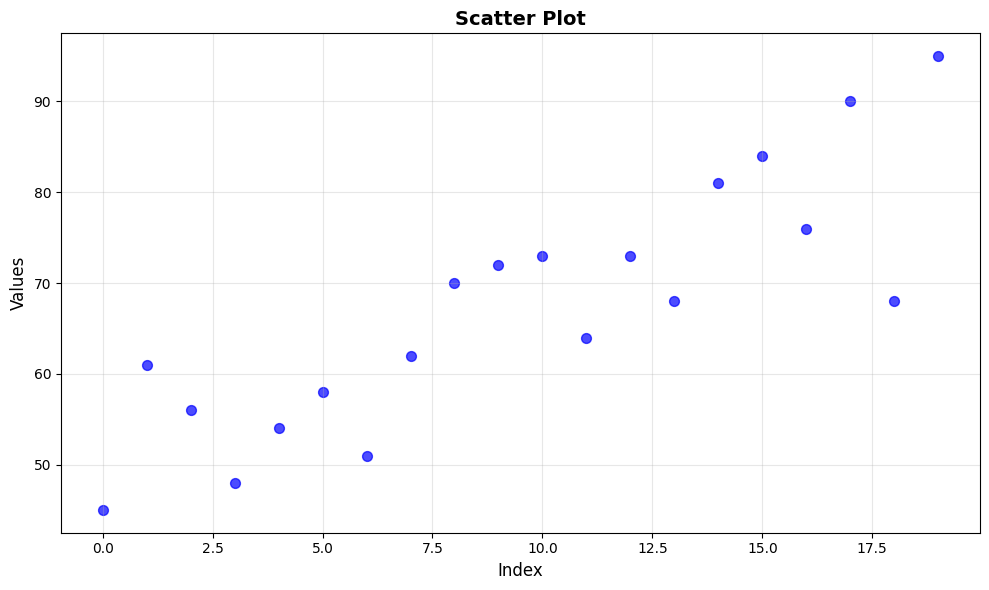

In [61]:
scatter_plot(test_time)
scatter_plot(mass)

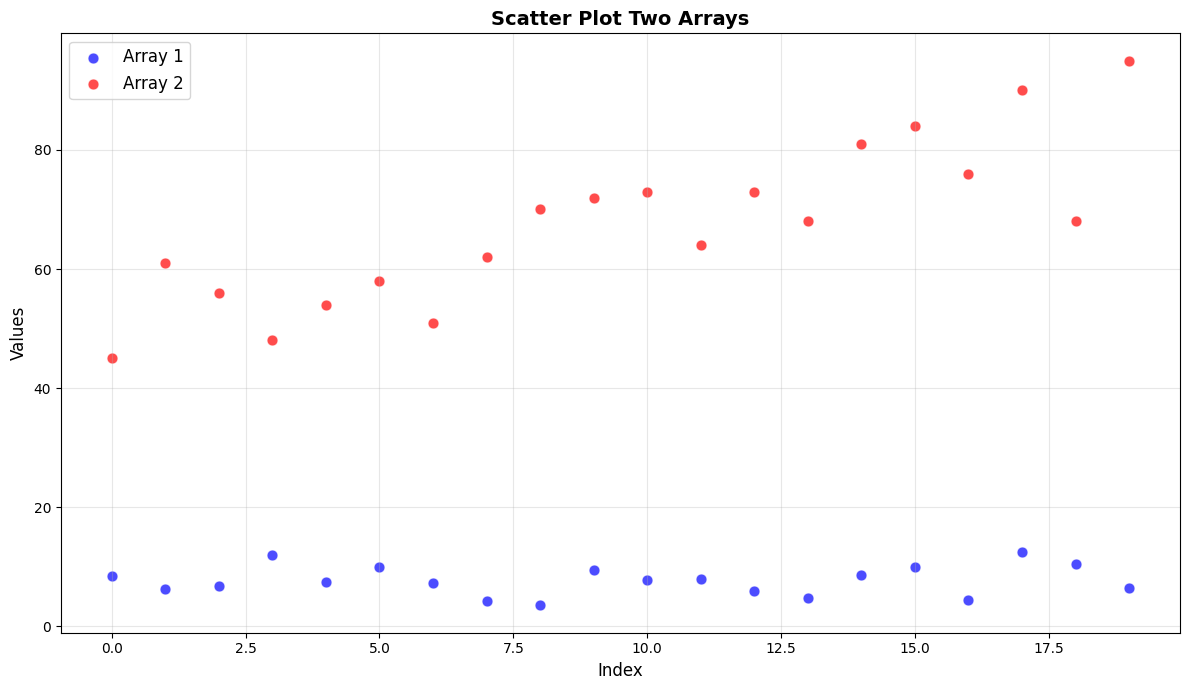

In [63]:
def scatter_plot_two_arrays(array1, array2, labels=None, title="Scatter Plot Two Arrays", 
                           xlabel="Index", ylabel="Values", colors=None, alpha=0.7):
    if colors is None:
        colors = ['blue', 'red']
    
    if labels is None:
        labels = ['Array 1', 'Array 2']
    
    plt.figure(figsize=(12, 7))
    
    x1 = range(len(array1))
    plt.scatter(x1, array1, color=colors[0], alpha=alpha, s=60, 
               edgecolors='white', linewidth=0.5, label=labels[0])
    
    x2 = range(len(array2))
    plt.scatter(x2, array2, color=colors[1], alpha=alpha, s=60, 
               edgecolors='white', linewidth=0.5, label=labels[1])
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

scatter_plot_two_arrays(test_time,mass)

# Как можно увидеть по графикам и гистограммам, корреляция между переменными также не наблюдается

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

In [93]:
def linear_regression(x, y, silent = False):

    n = len(x)
    
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    
    num = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    den = sum((x[i] - mean_x) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_x
    

    y_pred = [m * xi + b for xi in x]

    ss_total = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_res / ss_total)

    if not silent:
        print(f"Regression line: y = {m:.4f}x + {b:.4f}")
        plt.scatter(x, y, color="blue", label="Data points")
        plt.plot(x, y_pred, color="red", label="Regression line")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
        
    return m, b, r2

    

# Slope and intercept:
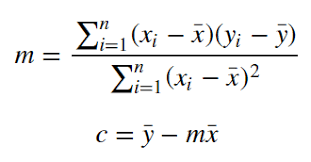
# $R^2$:
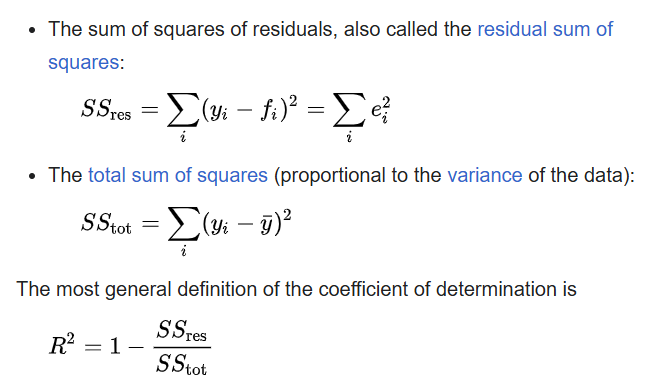

Regression line: y = 0.1011x + 66.6683


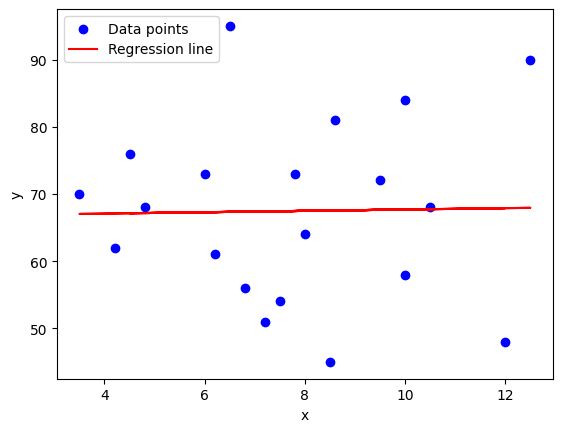

R^2 0.00035085107117527325


In [90]:
_, _, r1 = linear_regression(test_time, mass)
print(f'R^2 {r1}')

# Низкое значение $R^2$ и фактически прямая линяя указывает на отсутствие корреляции

# Функция для минимизации:
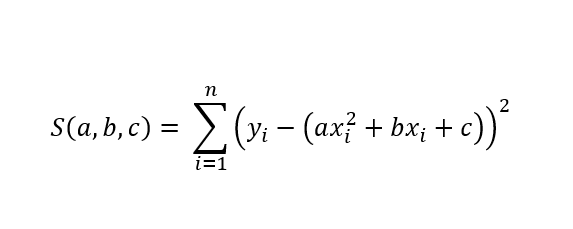

В частных производных 
∂S/∂a=0
∂𝑆/∂𝑏=0
∂S/∂c=0
Даёт систему:

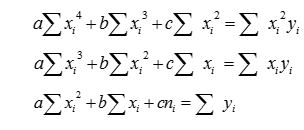

In [100]:
import numpy as np

def quadratic_regression(x, y, silent = False):
    n = len(x)
    X = [[xi**2, xi, 1] for xi in x]
    
    Sx4 = sum(xi**4 for xi in x)
    Sx3 = sum(xi**3 for xi in x)
    Sx2 = sum(xi**2 for xi in x)
    Sx1 = sum(xi for xi in x)
    Sx0 = n
    
    Sy = sum(y)
    Sx1y = sum(x[i]*y[i] for i in range(n))
    Sx2y = sum((x[i]**2)*y[i] for i in range(n))
    
    A = [
        [Sx4, Sx3, Sx2],
        [Sx3, Sx2, Sx1],
        [Sx2, Sx1, Sx0]
    ]
    B = [Sx2y, Sx1y, Sy]
    
    coeffs = np.linalg.solve(np.array(A, dtype=float), np.array(B, dtype=float))
    a, b, c = coeffs
    
    y_pred = [a*xi**2 + b*xi + c for xi in x]
    
    mean_y = sum(y)/n
    ss_tot = sum((yi-mean_y)**2 for yi in y)
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(n))
    r2 = 1 - ss_res/ss_tot
    

    if not silent:
        print(f"Quadratic regression: y = {a:.4f}x² + {b:.4f}x + {c:.4f}, R²={r2:.4f}")
        plt.scatter(x, y, color="blue")
        plt.plot(sorted(x), [a*xi**2 + b*xi + c for xi in sorted(x)], color="red")
        plt.show()
    
    return a, b, c, r2

Quadratic regression: y = 0.3395x² + -5.2818x + 85.9367, R²=0.0297


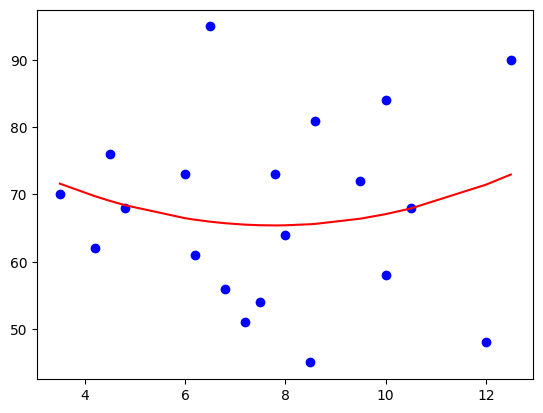

R^2 0.029730980329697787


In [101]:
print(f'R^2 {quadratic_regression(test_time, mass)[3]}')

# Те же выводы что и в линейной регрессии

In [94]:
def hyperbolic_regression(x, y, silent = False):
    
    # Transform z = 1/x
    z = [1/xi for xi in x]
    
    
    n = len(z)
    mean_z = sum(z) / n
    mean_y = sum(y) / n
    
    num = sum((z[i] - mean_z) * (y[i] - mean_y) for i in range(n))
    den = sum((z[i] - mean_z) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_z

    # Model: y = m*(1/x) + b
    y_pred = [m/xi + b for xi in x]
    
    ss_tot = sum((yi-mean_y)**2 for yi in y)
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(len(y)))
    r2 = 1 - ss_res/ss_tot
    
    if not silent:
        print(f"Hyperbolic regression: y = {m:.4f}/x + {b:.4f}, R²={r2:.4f}")
        plt.scatter(x, y, color="blue")
        plt.plot(sorted(x), [m/xi + b for xi in sorted(x)], color="red")
        plt.show()
    
    return m, b, r2

# Тот же самый МНК что и для линейное регрессии, но с предварительной трансформацеий $z=1/x$

Hyperbolic regression: y = 7.7135/x + 66.3291, R²=0.0010


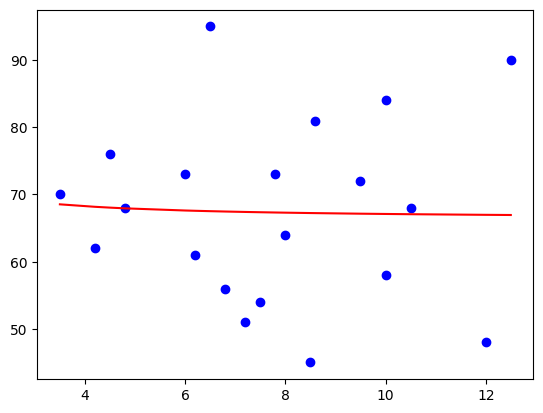

R^2 0.0009759298640179548


In [95]:
print(f'R^2 {hyperbolic_regression(test_time, mass)[2]}')

# Те же выводы что и в линейной регрессии

In [96]:
def power_regression(x, y, silent = False):
    
    logx = [math.log(xi) for xi in x]
    logy = [math.log(yi) for yi in y]
    
 
    n = len(logx)
    mean_logx = sum(logx) / n
    mean_logy = sum(logy) / n
    
    num = sum((logx[i] - mean_logx) * (logy[i] - mean_logy) for i in range(n))
    den = sum((logx[i] - mean_logx) ** 2 for i in range(n))
    b = num / den
    loga = mean_logy - b * mean_logx

    
    a = math.exp(loga)
    
    y_pred = [a * (xi**b) for xi in x]
    
    mean_y = sum(y)/len(y)
    ss_tot = sum((yi-mean_y)**2 for yi in y)
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(len(y)))
    r2 = 1 - ss_res/ss_tot
    if not silent:
        print(f"Power regression: y = {a:.4f} * x^{b:.4f}, R²={r2:.4f}")
        plt.scatter(x, y, color="blue")
        plt.plot(sorted(x), [a*(xi**b) for xi in sorted(x)], color="red")
        plt.show()
    
    return a, b, r2

# Тот же самый МНК что и для линейное регрессии, но с предварительной трансформацеий $ln(x)$ $ln(y)$

Power regression: y = 70.3361 * x^-0.0309, R²=-0.0114


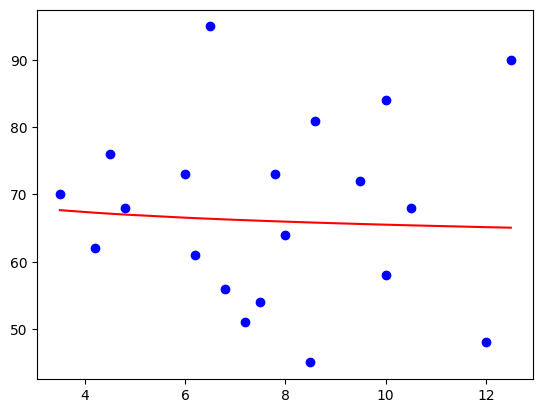

R^2 -0.011378742717431223


In [97]:
print(f'R^2 {power_regression(test_time, mass)[2]}')

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера


In [102]:
print(linear_regression(test_time, mass, True)[2])
print(quadratic_regression(test_time, mass, True)[3])
print(hyperbolic_regression(test_time, mass, True)[2])
print(power_regression(test_time, mass, True)[2])


0.00035085107117527325
0.029730980329697787
0.0009759298640179548
-0.011378742717431223


# Самое лучшее уравнение - квадратичное. Самое худшее - линейное

In [114]:
from scipy.stats import f

def quadratic_regression_test(x, y, silent=False, alpha=0.05):
    n = len(x)
    X = [[xi**2, xi, 1] for xi in x]
    
    Sx4 = sum(xi**4 for xi in x)
    Sx3 = sum(xi**3 for xi in x)
    Sx2 = sum(xi**2 for xi in x)
    Sx1 = sum(xi for xi in x)
    Sx0 = n
    
    Sy = sum(y)
    Sx1y = sum(x[i]*y[i] for i in range(n))
    Sx2y = sum((x[i]**2)*y[i] for i in range(n))
    
    A = [
        [Sx4, Sx3, Sx2],
        [Sx3, Sx2, Sx1],
        [Sx2, Sx1, Sx0]
    ]
    B = [Sx2y, Sx1y, Sy]
    
    coeffs = np.linalg.solve(np.array(A, dtype=float), np.array(B, dtype=float))
    a, b, c = coeffs
    
    y_pred = [a*xi**2 + b*xi + c for xi in x]
    
    mean_y = sum(y)/n
    ss_tot = sum((yi-mean_y)**2 for yi in y)
    ss_res = sum((y[i]-y_pred[i])**2 for i in range(n))
    r2 = 1 - ss_res/ss_tot
    
    k = 3  # 3 параметра в модели
    df_reg = k - 1  # степени свободы для регрессии
    df_res = n - k  # степени свободы для остатков
    ms_reg = (ss_tot - ss_res) / df_reg  # средний квадрат регрессии
    ms_res = ss_res / df_res  # средний квадрат остатков
    
    f_statistic = ms_reg / ms_res
    
    f_critical = f.ppf(1 - alpha, df_reg, df_res)
    
    is_model_adequate = f_statistic > f_critical
    
    if not silent:
        print(f"R² = {r2:.4f}")
        print(f"F-statistic = {f_statistic:.4f}")
        print(f"F-critical (α={alpha}) = {f_critical:.4f}")
        print(f"Model is adequate: {is_model_adequate}")
        print(f"SS_reg = {ss_tot - ss_res:.4f}, SS_res = {ss_res:.4f}")
        print(f"MS_reg = {ms_reg:.4f}, MS_res = {ms_res:.4f}")
        print(f"Degrees of freedom: regression = {df_reg}, residual = {df_res}")
        
    
    return f_statistic, f_critical, is_model_adequate

In [118]:
print(f'{quadratic_regression_test(test_time, mass)[2]}')

R² = 0.0297
F-statistic = 0.2605
F-critical (α=0.05) = 3.5915
Model is adequate: False
SS_reg = 104.8002, SS_res = 3420.1498
MS_reg = 52.4001, MS_res = 201.1853
Degrees of freedom: regression = 2, residual = 17
False


In [120]:
from scipy.stats import f

def linear_regression_test(x, y, silent=False, alpha=0.05):
    n = len(x)
    
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    num = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    den = sum((x[i] - mean_x) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_x
    
    y_pred = [m * xi + b for xi in x]

    ss_total = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_res / ss_total)
    
    k = 2  # 2 параметра
    df_reg = k - 1  
    df_res = n - k  
    
    ms_reg = (ss_total - ss_res) / df_reg  
    ms_res = ss_res / df_res  
    
    f_statistic = ms_reg / ms_res
    
    f_critical = f.ppf(1 - alpha, df_reg, df_res)
    
    is_model_adequate = f_statistic > f_critical

    if not silent:
        print(f"F-statistic = {f_statistic:.4f}")
        print(f"F-critical (α={alpha}) = {f_critical:.4f}")
        print(f"Model is adequate: {is_model_adequate}")
        print(f"SS_reg = {ss_total - ss_res:.4f}, SS_res = {ss_res:.4f}")
        print(f"MS_reg = {ms_reg:.4f}, MS_res = {ms_res:.4f}")
        print(f"Degrees of freedom: regression = {df_reg}, residual = {df_res}")

        
    return f_statistic, f_critical, is_model_adequate

In [122]:
print(linear_regression_test(test_time, mass)[2])

F-statistic = 0.0063
F-critical (α=0.05) = 4.4139
Model is adequate: False
SS_reg = 1.2367, SS_res = 3523.7133
MS_reg = 1.2367, MS_res = 195.7618
Degrees of freedom: regression = 1, residual = 18
False


# Как видим, согласно всем тестам наша модель не является адекватной. Из всего вышепроделанного можем сделать вывод, что статистики test_time и mass не имеют никакой корреляции